# Importing and Querying Data with PostgreSQL (Northwind Database)

Describtion of the Northwind Database: https://en.wikiversity.org/wiki/Database_Examples/Northwind 

Example SQL-Queries based on the Northwind Database: https://www.w3schools.com/sql/default.asp

SQL Tutorials: https://www.youtube.com/watch?v=zpnHsWOy0RY&list=PLP9IO4UYNF0UQkBXlTMSw0CYsxv-GDkkI

## Frequently used SQL clauses (for in-depth learning)

<div>
  <style>
    .sql-keyword {
      color: blue;
    }
  </style>
  <span class="sql-keyword">SELECT</span><br>
  <span class="sql-keyword">SELECT DISTINCT</span><br>
  <span class="sql-keyword">FROM</span><br>
  <span class="sql-keyword">WHERE</span><br>
  <span class="sql-keyword">AND</span><br>
  <span class="sql-keyword">LIKE</span><br>
  <span class="sql-keyword">GROUP BY</span><br>
  <span class="sql-keyword">HAVING</span><br>
  <span class="sql-keyword">ORDER BY</span><br>
  <span class="sql-keyword">FULL JOIN</span><br>
  <span class="sql-keyword">INNER JOIN</span><br>
  <span class="sql-keyword">LEFT JOIN</span><br>
  <span class="sql-keyword">RIGHT JOIN</span><br>
  <span class="sql-keyword">ON</span><br>
  <span class="sql-keyword">LIMIT</span><br>
  <span class="sql-keyword">AS</span><br>
  <span class="sql-keyword">AVG</span><br>
  <span class="sql-keyword">COUNT</span><br>
  <span class="sql-keyword">MIN</span><br>
  <span class="sql-keyword">MAX</span><br>
  <span class="sql-keyword">SUM</span><br>
  <span class="sql-keyword">BETWEEN</span><br>
  <span class="sql-keyword">IN</span><br>
  <span class="sql-keyword">IS NULL</span><br>
  <span class="sql-keyword">IS NOT NULL</span><br> 
  <span class="sql-keyword">ROUND</span><br> 
  <span class="sql-keyword">CAST</span><br>
  <span class="sql-keyword">NUMERIC</span><br>
  <span class="sql-keyword">INTEGER</span>  
</div>

## Libraries and Settings

In [4]:
# Libraries
import os
import pandas as pd
from sqlalchemy import create_engine, text
import matplotlib.pyplot as plt

# Settings
import warnings
warnings.filterwarnings("ignore")

# Current working directory
print(os.getcwd())

/


## Read data from .csv files to separate data frames 

In [6]:
# Read all sheets
df = pd.read_excel('workspace/Data/Northwind_Database.xlsx', sheet_name=None)

# List all sheet names (keys)
print("Available sheets:", df.keys())

# Access specific DataFrames
df_orders = df['Orders']
df_customers = df['Customers']
df_products = df['Products']

# Display data from 'Orders' sheet
print(df_orders.head())


Available sheets: dict_keys(['ER-Diagram', 'Categories', 'Customers', 'Employees', 'OrderDetails', 'Orders', 'Products', 'Shippers', 'Suppliers'])
   orderid  customerid  employeeid            orderdate  shipperid
0    10248          90           5  1996-07-04 00:00:00          3
1    10249          81           6  1996-07-05 00:00:00          1
2    10250          34           4  1996-07-08 00:00:00          2
3    10251          84           3  1996-07-08 00:00:00          1
4    10252          76           4  1996-07-09 00:00:00          2


In [7]:
# Read data from Excel file
df = pd.read_excel('workspace/Data/Northwind_Database.xlsx')
df.head(5)


,Unnamed: 0,ER-Diagram Northwind Database
0,NaN,NaN
1,NaN,https://en.wikiversity.org/wiki/Database_Examp...


## Create database connection

In [8]:
# Set up database connection
user = "pgadmin"
password = "geheim"
host = "db"
port = "5432"
database = "northwind"

# Create Connection URL
db_connection_url = "postgresql://" + user + ":" + password +\
                    "@" + host + ":" + port + "/" + database

# Create SQLAlchemy Engine
engine = create_engine(db_connection_url)

# Test database connection
with engine.connect() as connection:
    result = connection.execute(text('SELECT current_database()'))
    print(result.fetchone())

# Dispose the engine
engine.dispose()

('northwind',)


## Write data frame to database table

In [9]:
# Engine für Datenbankverbindung erstellen
engine = create_engine(db_connection_url)

# Schreiben der DataFrames in die Datenbank
df.to_sql('northwind_table', engine, if_exists='replace')

# Datenbankverbindung trennen
engine.dispose()

## List tables in the database

In [10]:
# Create SQLAlchemy Engine
engine = create_engine(db_connection_url)

# Open a connection
with engine.connect() as connection:

    # Execute the query
    result = connection.execute(text("""SELECT table_name
                                        FROM information_schema.tables
                                        WHERE table_schema = 'public'"""))
    
    # Fetch and print the results
    for row in result:
        print(row[0])

# Dispose the engine
engine.dispose()

categories
customers
employees
orderdetails
orders
products
shippers
suppliers
northwind_table


## Create a SQL query to retrieve product information from a database.

In [12]:
# Create SQLAlchemy Engine
engine = create_engine(db_connection_url)

# Write data to table
df_sub = pd.read_sql_query('''SELECT 
    ProductName, 
    ROUND(CAST(Price AS NUMERIC), 2) AS Price
FROM Products
ORDER BY Price DESC
LIMIT 5;''', con=engine)

# Dispose the engine
engine.dispose()

# Show the data
df_sub


,productname,price
0,Côte de Blaye,263.50
1,Thüringer Rostbratwurst,123.79
2,Mishi Kobe Niku,97.00
3,Sir Rodney's Marmalade,81.00
4,Carnarvon Tigers,62.50


## Plot product prices

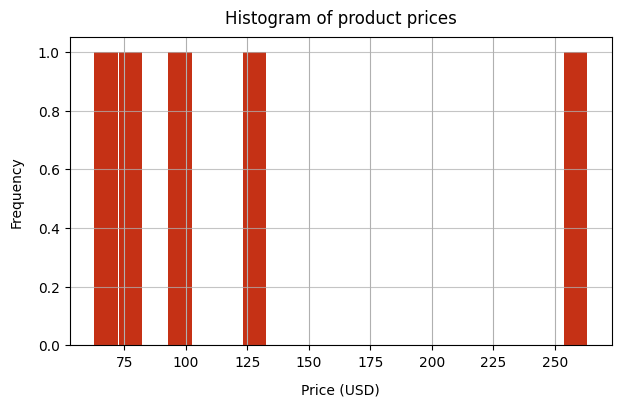

In [13]:
# Plot Histogram
fig = plt.figure( figsize=(7,4))
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
n, bins, patches = plt.hist(x=df_sub['price'], 
                            bins=20, 
                            color='#C53115',
                            alpha=1.00, 
                            rwidth=0.95
                   )
plt.grid(True)
plt.ticklabel_format(style='plain')
plt.grid(axis='y', alpha=0.75)

# Set labels
plt.xlabel('Price (USD)', fontsize=10, labelpad=10)
plt.ylabel('Frequency', fontsize=10, labelpad=10)
plt.title('Histogram of product prices', fontsize=12, pad=10)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [14]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.5.0-1025-azure
Datetime: 2024-10-02 13:55:05
Python Version: 3.11.10
-----------------------------------
